# Time series classification

a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29

b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data. <br>
Splitting of data done

c)Feature Extraction

# ci)Research what types of time-domain features are usually used in time seriescclassification and list them
Some of the time domain features used in classification are:
1. Maximum value of series
2. Minimum value of series
3. Range
4. Mean value of the time series
5. Median
6. Inter-quartile range
7. Coefficient of Kurtosis
8. First Quartile
9. Third Quartile
10. Coefficient of Skewness
11. Number of positive/negative peaks
12. Moving average component

# cii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance

In [83]:
import pandas as pd
import numpy as np
import os
import sys
d={}
feat = ['mean','min','max','median','Q1','Q3','std']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\milon\Documents\GitHub\.ipynb_checkpoints\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            d["min-"+c].append((np.min(df[c])))
            d["max-"+c].append((np.max(df[c])))
            d["median-"+c].append((np.median(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            d["Q3-"+c].append((np.percentile(df[c],75)))
            d["std-"+c].append((np.std(df[c])))
        d['activity'].append(activity)
frame=pd.DataFrame(d)

In [84]:
frame.shape

(88, 43)

# ciii) Estimate the standard deviation of each of the time-domain features you extracted from the data

In [85]:
st_dev=np.std(frame)
print((st_dev))

mean-avg_rss12      5.305314
mean-var_rss12      1.565194
mean-avg_rss13      3.985540
mean-var_rss13      1.159470
mean-avg_rss23      5.643253
mean-var_rss23      1.148232
min-avg_rss12       9.515445
min-var_rss12       0.000000
min-avg_rss13       2.939616
min-var_rss13       0.000000
min-avg_rss23       6.089107
min-var_rss23       0.045577
max-avg_rss12       4.369322
max-var_rss12       5.033882
max-avg_rss13       4.847358
max-var_rss13       2.171183
max-avg_rss23       5.708524
max-var_rss23       2.504568
median-avg_rss12    5.409056
median-var_rss12    1.404197
median-avg_rss13    4.013397
median-var_rss13    1.139058
median-avg_rss23    5.780655
median-var_rss23    1.080284
Q1-avg_rss12        6.118526
Q1-var_rss12        0.940994
Q1-avg_rss13        4.196608
Q1-var_rss13        0.838813
Q1-avg_rss23        6.061727
Q1-var_rss23        0.754261
Q3-avg_rss12        5.109643
Q3-var_rss12        2.113157
Q3-avg_rss13        4.147858
Q3-var_rss13        1.543658
Q3-avg_rss23  

In [86]:
frame.drop('activity',axis=1,inplace=True)

# 90% Bootstrap Confidence Interval

In [87]:
from scipy.stats import sem, t
from scipy import mean
from sklearn.utils import resample
from matplotlib import pyplot
import math 
c1={}
c2={}
stat=[]
n=1000
alpha = 0.90
for colum in frame.columns.tolist():
    boot=[]
    for i in range(n):
        re=resample(frame[colum], n_samples=88)
        boot.append(np.std(re))
    sortd=boot.sort()
    c1[colum]=boot[49]
    c2[colum]=boot[949]
    #lower = max(0.0, np.percentile(sortd, p))
    #p = (alpha+((1.0-alpha)/2.0)) * 100
    #upper = min(1.0, np.percentile(sortd, p1))
#print(c1)
#print(c2)
l1=pd.DataFrame.from_dict(c1,orient='index') 
u1=pd.DataFrame.from_dict(c2,orient='index')
lower=l1.rename(columns={0:'Confidence Interval 5%'})
upper=u1.rename(columns={0:'Confidence Interval 95%'})
ci=lower.join(upper)
std_dev=pd.DataFrame(st_dev).rename(columns={0:"Standard Deviation"})
final=std_dev.join(ci)

In [88]:
final

,Standard Deviation,Confidence Interval 5%,Confidence Interval 95%
mean-avg_rss12,5.305314,4.687328,5.856011
mean-var_rss12,1.565194,1.391510,1.695483
mean-avg_rss13,3.985540,3.426729,4.432370
mean-var_rss13,1.159470,1.074203,1.216716
mean-avg_rss23,5.643253,4.432935,6.678833
mean-var_rss23,1.148232,1.051968,1.208701
min-avg_rss12,9.515445,8.118492,10.710131
min-var_rss12,0.000000,0.000000,0.000000
min-avg_rss13,2.939616,2.737175,3.104544
min-var_rss13,0.000000,0.000000,0.000000


# d iv) Use your judgement to select the three most important time-domain features

The three features being used further are:
1. Mean- to capture the average values of the time series
2. First Quartile- to see lower bound values of the series
3. Max- to utilise the peak values of the time series

In [89]:
feat = ['mean','min','max','median','Q1','Q3','std']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\test\{}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            d["min-"+c].append((np.min(df[c])))
            d["max-"+c].append((np.max(df[c])))
            d["median-"+c].append((np.median(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            d["Q3-"+c].append((np.percentile(df[c],75)))
            d["std-"+c].append((np.std(df[c])))
        d['activity'].append(activity)
test=pd.DataFrame(d)

In [90]:
test.shape

(19, 43)

In [91]:
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            d["min-"+c].append((np.min(df[c])))
            d["max-"+c].append((np.max(df[c])))
            d["median-"+c].append((np.median(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            d["Q3-"+c].append((np.percentile(df[c],75)))
            d["std-"+c].append((np.std(df[c])))
        d['activity'].append(activity)
train=pd.DataFrame(d)

In [92]:
train.shape

(69, 43)

# d) Binary Classification using Logistic Regression

# d i)

In [93]:
query1=[col for col in train.columns.tolist() if ((col.startswith('mean') or col.startswith('Q1') or col.startswith('max')) and (col.endswith('avg_rss12') or col.endswith('var_rss12') or col.endswith('var_rss23')) or col=='activity')]

In [94]:
query1

['mean-avg_rss12',
 'mean-var_rss12',
 'mean-var_rss23',
 'max-avg_rss12',
 'max-var_rss12',
 'max-var_rss23',
 'Q1-avg_rss12',
 'Q1-var_rss12',
 'Q1-var_rss23',
 'activity']

In [95]:
train['activity'] = np.where(((train['activity'] == 'bending1')|(train['activity'] == 'bending2')),'bending','not-bending')

In [96]:
t1=train[query1]
#print(t1)
extra=pd.DataFrame()
j=0
k=1
for c1 in t1.columns.tolist()[:-1]:
    
    for i in range(0,69):
        extra.loc[j,'val'] = t1.loc[i,c1]
        extra.loc[j,'col'] = str(k)
        j = j + 1
    k = k + 1

In [97]:
j=0
for i in range(0,621):
    extra.loc[i,'activity'] = t1.loc[j,'activity']
    j = j + 1
    if j == 69:
        j=0

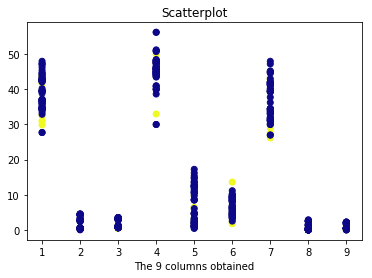

In [98]:
import matplotlib.pyplot as plt
extra['1/0'] = np.where(extra['activity'] == 'bending',1,0)
sc=plt.scatter(extra['col'],extra['val'],c=extra['1/0'],cmap='plasma')
plt.title('Scatterplot')
plt.xlabel("The 9 columns obtained")
plt.show()

After perfroming the binary classification, we can see from the scatter plot that "Not Bending" is depicted by "Dark Blue" and the "Bending" activities by "Yellow". Since, the number of instances for Not Bending are considerably more than those of Bending, it is an imbalanced class distribution. <br>
I have divided the train having 69 rows twice, so obtained 9 columns in total which is the X-axis which are 
 'mean-avg_rss12',
 'mean-var_rss12',
 'mean-var_rss23',
 'max-avg_rss12',
 'max-var_rss12',
 'max-var_rss23',
 'Q1-avg_rss12',
 'Q1-var_rss12',
 'Q1-var_rss23'.

# d ii) Break each time series in your training set into two equal length time series

In [99]:
d={}
feat = ['mean','Q1','max']
col = ['avg_rss12','var_rss12','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]

for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        split=np.array_split(df,2)
        for s in split:
            for c in col:
                d["mean-"+c].append((np.mean(s[c])))
                d["Q1-"+c].append((np.percentile(s[c],25)))
                d["max-"+c].append((np.max(s[c])))
            
            
            d['activity'].append(activity)
train1=pd.DataFrame(d)
half=pd.DataFrame(train1)
half['activity'] = np.where(((half['activity'] == 'bending1')|(half['activity'] == 'bending2')),'bending','not-bending')
extra1=pd.DataFrame()
j1=0
k1=1
for c2 in half.columns.tolist()[:-1]:
    
    for i in range(0,138):
        extra1.loc[j1,'val'] = half.loc[i,c2]
        extra1.loc[j1,'col'] = str(k1)
        j1 = j1 + 1
    k1 = k1 + 1
#extra1

j2=0
for i in range(0,1242):
    extra1.loc[i,'activity'] = half.loc[j2,'activity']
    j2 = j2 + 1
    if j2 == 138:
        j2=0

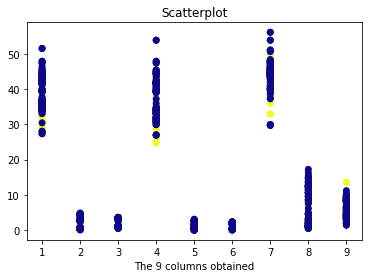

In [100]:
import matplotlib.pyplot as plt
extra1['1/0'] = np.where(extra1['activity'] == 'bending',1,0)
sc1=plt.scatter(extra1['col'],extra1['val'],c=extra1['1/0'],cmap='plasma')
plt.title('Scatterplot')
plt.xlabel("The 9 columns obtained")
plt.show()

There is no much considerable difference between the 2 scatter plots after dividing the training set into two equal length time series.

# d iii) Break each time series in your training set into l from (1,20) time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features


In [101]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.feature_selection import chi2, RFECV

In [102]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
feat = ['mean','Q1','max']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
gi={}
gj={}
feats={}
vi={}
tr={}
featss={}
for l in range(1,21):
    dt={}
    for c in col:
        for f in feat:
            dt[c+"_"+f]=[]
        dt['activity']=[]
    for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(act)
        for filename in os.listdir(path):
            df1=pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
            ss=np.array_split(df1,l)
            for s in ss:
                for c1 in col:
                    dt[c1+"_mean"].append(np.mean(s[c1]))
                    dt[c1+"_Q1"].append(np.percentile(s[c1],25))
                    dt[c1+"_max"].append(np.max(s[c1]))
                dt['activity'].append(act)
    df_train = pd.DataFrame(dt)
    df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
    #df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
    X = df_train.loc[:,df_train.columns!='activity']
    y = df_train['activity']

    auc1 = []
    score1=[]
    feats=[]
    flist=[]
    vallist=[]
    trainlist=[]
    pval=[]
    kf = StratifiedKFold(n_splits=5)
    for train_index,val_index in kf.split(X,y):
        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        model = LogisticRegression()
        r1 = RFECV(estimator=model,cv=StratifiedKFold(5),scoring='accuracy')
        subset=r1.fit(X_train,y_train).ranking_==1
        trainx=X_train.loc[:,subset]
        trainval=X_val.loc[:,subset]
        model = model.fit(trainx, y_train)
        valid = [1 if i == 'bending' else 0 for i in y_val.tolist()]
        predicted = [1 if i == 'bending' else 0 for i in model.predict(trainval).tolist()]
        fpr, tpr, thershold = roc_curve(valid,predicted)
        auc1.append(auc(fpr, tpr))
        score1.append(model.score(trainval,y_val))
        flist.append(trainx.columns)
        vallist.append(val_index)
        trainlist.append(train_index)
    f,p=chi2(X_train,y_train)
    pval.append(p)
        #print(auc1)
    gi[l] = np.mean(auc1)
    gj[l]= np.mean(score1)   
    featss[l]=subset[np.argmax(auc1)]
    vi[l]=vallist[np.argmax(auc1)]
    tr[l]=trainlist[np.argmax(auc1)]
    

In [103]:
tab = pd.DataFrame(gj,index=[0])
tab= tab.T
tab.rename(columns={0:'Mean Score across the folds'},inplace=True)
print(tab)

    Mean Score across the folds
1                      0.942857
2                      0.914021
3                      0.893148
4                      0.916364
5                      0.924638
6                      0.910696
7                      0.902899
8                      0.914660
9                      0.925806
10                     0.905797
11                     0.892018
12                     0.893728
13                     0.909565
14                     0.895337
15                     0.901449
16                     0.913052
17                     0.886634
18                     0.902471
19                     0.909924
20                     0.886232


### From above, we get highest score for L=1

In [104]:
tab = pd.DataFrame(gi,index=[0])
tab= tab.T
tab.rename(columns={0:'Mean AUC across the folds'},inplace=True)
print(tab)

    Mean AUC across the folds
1                    0.966667
2                    0.900000
3                    0.842222
4                    0.866667
5                    0.890556
6                    0.851641
7                    0.847253
8                    0.843601
9                    0.781713
10                   0.752222
11                   0.769793
12                   0.770004
13                   0.752885
14                   0.762833
15                   0.795370
16                   0.819099
17                   0.751828
18                   0.809165
19                   0.828122
20                   0.738611


### From above, we get maximum AUC for L=1

# P-values

In [105]:
pval

[array([6.80899860e-002, 9.00506516e-002, 6.95164507e-003, 3.10961719e-010,
        2.15720960e-008, 1.72620394e-021, 1.34132158e-018, 8.37680601e-017,
        2.65897910e-016, 5.37307655e-007, 8.64380419e-008, 2.68403551e-005,
        6.00980379e-245, 9.51325299e-286, 1.48288861e-159, 6.39050312e-013,
        5.51350496e-011, 8.30663967e-025])]

# Backward Selection using L=1, here instead of K fold CV, I am using Stratified Cross Validation since there is an imbalance in the classes as observed from the scatter plots too.

In [106]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
l=1
dtrain={}
feat = ['mean','Q1','max']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        dtrain[f+"-"+c]=[]
dtrain['activity']=[]

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(act)
        for filename in os.listdir(path):
            df1=pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
            sss=np.array_split(df1,l)
            for s in sss:
                for c6 in col:
                    dtrain["mean-"+c6].append(np.mean(s[c6]))
                    dtrain["Q1-"+c6].append(np.percentile(s[c6],25))
                    dtrain["max-"+c6].append(np.max(s[c6]))
                dtrain['activity'].append(act)
df_train = pd.DataFrame(dtrain)
df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
#df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
X = df_train.loc[:,df_train.columns!='activity']
y = df_train['activity']
auc1 = []
variables = []
l1 = []
l2 = []

kf = StratifiedKFold(n_splits=5)

for train_index,val_index in kf.split(X,y):
    X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
    y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
    if len(np.unique(y_val)) == 1:
        continue
    model = LogisticRegression()
    rfe = RFE(model,6,step=1)

    subset = rfe.fit(X_train, y_train).ranking_ == 1
    X_train = X_train.loc[:,subset]
    X_val = X_val.loc[:,subset]
    model = model.fit(X_train, y_train)
    actual1=[]
    pred1=[]
    for i2 in y_val.tolist():
        if i2=="bending":
            actual1.append(1)
        else:
            actual1.append(0)
    for i3 in model.predict(X_val).tolist():
        if i3=="bending":
            pred1.append(1)
        else:
            pred1.append(0) 
    
    f1, t1, _ = roc_curve(actual1,pred1)
    auc1.append(auc(f1, t1))
    variables.append(X_train.columns.tolist())
    l1.append(train_index.tolist())
    l2.append(val_index.tolist())
tup = tuple(zip(auc1,variables,l1,l2))

In [107]:
auc1

[1.0, 0.9583333333333333, 0.9583333333333333, 1.0, 1.0]

Above we performed Stratified Cross Validation and then feature subset selection using Recursive Feature Elimination to the Logistic Regression problem. <br>
The right way is within the Cross Validation use perfrom Feature Selection.
The correct way of performing cross validation in this scenario is to find the best L. After finding the best L, run 5-fold cross validation again to find the best feature subset by running the logistic regression model with a different subset of features on each fold. <br>
The wrong way of doing it is, after the completion of Cross Validation selecting the best features would be incorrect.

# d iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression as well as the p-values associated with them

In [108]:
L = 1
feature_subset = tup[0][1]
train_index = tup[0][2]
val_index = tup[0][3]
d7 = {}
feat = ['mean','Q1','max']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d7[f+"-"+c]=[]
d7['activity']=[]
for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(act)
        for filename in os.listdir(path):
            df1=pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
            sss=np.array_split(df1,l)
            for s1 in sss:
                for c6 in col:
                    d7["mean-"+c6].append(np.mean(s1[c6]))
                    d7["Q1-"+c6].append(np.percentile(s1[c6],25))
                    d7["max-"+c6].append(np.max(s1[c6]))
                d7['activity'].append(act)
df_train = pd.DataFrame(d7)
print(feature_subset)

['mean-avg_rss12', 'mean-avg_rss13', 'mean-avg_rss23', 'Q1-avg_rss23', 'max-avg_rss23', 'max-var_rss23']


In [109]:
df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
X = df_train.loc[:,df_train.columns!='activity']
X = X[feature_subset]
y = df_train['activity']
X_train, X_val = X.iloc[train_index,:], X.iloc[val_index,:]
y_train, y_val = y[train_index], y[val_index]

In [110]:
log1 = LogisticRegression()
model = log1.fit(X_train, y_train)
actual2 = [1 if i == 'bending' else 0 for i in y_val.tolist()]
predicted2 = [1 if i == 'bending' else 0 for i in model.predict(X_val).tolist()]

In [111]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
cm = metrics.confusion_matrix(actual2,predicted2)
print(cm)

[[11  0]
 [ 0  3]]


In [112]:
f2, t2, _ = roc_curve(actual2,predicted2)
r2 = auc(f2, t2)
print(r2)

1.0


# ROC and AUC, Co-efficients, P-values

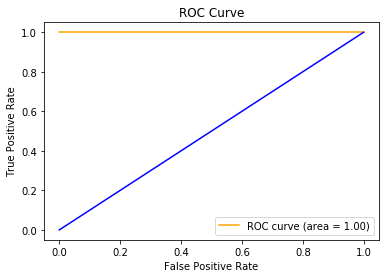

In [113]:
plt.figure()
plt.plot(f2, t2, color='orange',label='ROC curve (area = %0.2f)' % r2)
plt.plot([0, 1], [0, 1], color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [114]:
coef = pd.DataFrame({"Features":feature_subset,"Coefficient":model.coef_[0].tolist()})
coef[['Features','Coefficient']]

,Features,Coefficient
0,mean-avg_rss12,0.618748
1,mean-avg_rss13,0.486389
2,mean-avg_rss23,-0.375408
3,Q1-avg_rss23,-0.501882
4,max-avg_rss23,-0.628027
5,max-var_rss23,0.584346


In [115]:
from sklearn.feature_selection import chi2
f,p=chi2(X_train,y_train)
print(p)

[9.67967873e-01 6.83755707e-02 5.96129567e-10 2.36650487e-12
 3.03109728e-09 2.55865385e-01]


# d v)Test the classifier on the test set.

In [116]:
d={}
feat = ['mean','max','Q1']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\test\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            
            d["max-"+c].append((np.max(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            
        d['activity'].append(activity)
test=pd.DataFrame(d)
df_test = pd.DataFrame(test)
df_test['activity'] = np.where(((df_test['activity'] == 'bending1')|(df_test['activity'] == 'bending2')),'bending','not-bending')
X1 = df_test.loc[:,df_test.columns!='activity']
y1 = df_test['activity']
X1 = X1[feature_subset]

In [117]:
#df_train

In [118]:
feature_subset.append('activity')

In [119]:
df_train = df_train[feature_subset]
df_test = df_test[feature_subset]

In [120]:
#df_test

In [121]:
X_train9 = df_train.loc[:,df_train.columns!='activity']
y_train9 = df_train['activity']
X_test9 = df_test.loc[:,df_test.columns!='activity']
y_test9 = df_test['activity']

model4 = LogisticRegression()
model4 = model4.fit(X_train9, y_train9)
actual4 = [1 if i == 'bending' else 0 for i in y_test9.tolist()]
predicted4 = [1 if i == 'bending' else 0 for i in model4.predict(X_test9).tolist()]

cm1 = metrics.confusion_matrix(actual4,predicted4)
print("Confusion Matrix for the test set: ")
print(cm1)

f4, t4, _ = roc_curve(actual4,predicted4)
r4 = auc(f4, t4)
print("AUC for the test set: ")
print(r4)
print("Accuracy=",model4.score(X_test9,y_test9))

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]
AUC for the test set: 
1.0
Accuracy= 1.0


On the training set, we get accuracy equal to 1. And on the test set, we get accuracy equal to 1.0. It implies that the model is testing and training properly leading to complete accuracy.

# d vi Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

In the cross validation folds, it can be understood that the classes are not evenly distributed. There is a significant class imbalance. I have randomly shuffled the data ie used sample to try and capture the minority classses. This helped in reducing the instability in the parameters of logistic regression. As seen in the code, I have used continue and if len(np.unique(y_val)) == 1: to bypass the validation errors for some. There is class imbalance for L=1 also, there I have used StratifiedKFold Validation.

# d vii Build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model

In [122]:
X_train = df_train.loc[:,df_train.columns!='activity']
y_train = df_train['activity']
X_test = df_test.loc[:,df_test.columns!='activity']
y_test = df_test['activity']

model = LogisticRegression(class_weight='balanced')
model = model.fit(X_train, y_train)
actual = [1 if i == 'bending' else 0 for i in y_test.tolist()]
predicted = [1 if i == 'bending' else 0 for i in model.predict(X_test).tolist()]

cm = metrics.confusion_matrix(actual,predicted)
print("Confusion Matrix for the test set: ")
print(cm)

fpr, tpr, _ = roc_curve(actual,predicted)
roc_auc = auc(fpr, tpr)
print("AUC for the test set: ")
print(roc_auc)
print("Accuracy=",model.score(X_train,y_train))

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]
AUC for the test set: 
1.0
Accuracy= 1.0


# Used class_weight='balanced' above

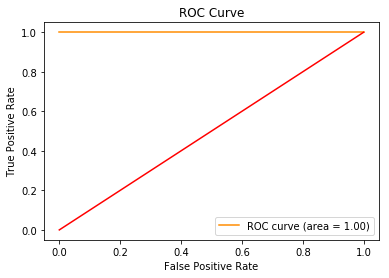

In [123]:
fpr, tpr, _ = roc_curve(actual,predicted)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# e i Binary Classification using L1-penalized Logistic Regression
Using Stratified Cross validation both on L and C (set by default to be ten values in a logarithmic scale between 1e-4 and 1e4 by sklearn) and Normalizing each feature to [0,1] scale.

In [124]:
d={}
feat = ['mean','max','median']
col = ['avg_rss12','var_rss12','var_rss23']
for l in range(1,21,1):
    dtrain={}
    for f in feat:
        for c in col:
            d[f+"-"+c]=[]
    d['activity']=[]

In [125]:
w={}
params = ['mean','median','max']
var1 = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for l in range(1,21):
    d_train = {}
    for v in var1:
        for p in params:
            d_train[v+"_"+p] = []
    d_train['activity'] = []
    
    for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(activity)
        for filename in os.listdir(path):
            df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
            #print(path+'\\'+filename)
            df_l=np.array_split(df,l)
            for li in df_l:
                for v in var1:
                    d_train[v+"_mean"].append((np.mean(df[v])))
            
                    d_train[v+"_median"].append((np.median(df[v])))
                    d_train[v+"_max"].append((np.max(df[v])))
                d_train['activity'].append(activity)
    df_train = pd.DataFrame(d_train)
    df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
    
    df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
    X = df_train.loc[:,df_train.columns!='activity']
    y = df_train['activity']
    
    x=X.values
    norm=preprocessing.MinMaxScaler()
    scaled=norm.fit_transform(x)
    X=pd.DataFrame(scaled,columns=X.columns) 
    
    a1=[]
    c1=[]
    
    cv1=StratifiedKFold(n_splits=5)
    for train_index,val_index in cv1.split(X,y):
        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        if len(np.unique(y_val)) == 1:
            continue
        
        reg2 = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        lr = reg2.fit(X_train, y_train)
        actual0 = [1 if i == 'bending' else 0 for i in y_val.tolist()]
        predicted0 = [1 if i == 'bending' else 0 for i in lr.predict(X_val).tolist()]
        fpr, tpr, _ = roc_curve(actual0,predicted0)
        a1.append(auc(fpr, tpr))
        c1.append(lr.C_)
    
    w[l]=tuple(zip(a1,c1))

In [126]:
auc2 = []
C1 = []
for i in w.keys():
    for j in range(0,5):
        auc2.append(w[i][j][0])
for i in w.keys():
    for j in range(0,5):
        C1.append(w[i][j][1][0])

In [127]:
a = pd.DataFrame({"L":list(np.repeat(list(w.keys()),5)),"CV AUC":auc2,"Optimal C":C1})
a[['CV AUC','Optimal C','L']]

,CV AUC,Optimal C,L
0,1.000,2.782559,1
1,0.750,2.782559,1
2,1.000,2.782559,1
3,1.000,2.782559,1
4,0.500,2.782559,1
5,0.875,2.782559,2
6,0.750,2.782559,2
7,1.000,21.544347,2
8,1.000,21.544347,2
9,1.000,1291.549665,2


# I did, StratifiedKFold Validation first for 5 folds, and then within it I performed Logistic Regression CV within it. The L values are displayed above with optimal C and AUC.

In [128]:
d={}
feat = ['mean','max','median']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\test\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            
            d["max-"+c].append((np.max(df[c])))
            d["median-"+c].append((np.median(df[c])))
            
        d['activity'].append(activity)
test=pd.DataFrame(d)
df_test = pd.DataFrame(test)
df_test['activity'] = np.where(((df_test['activity'] == 'bending1')|(df_test['activity'] == 'bending2')),'bending','not-bending')


In [129]:
X_train4 = df_train.loc[:,df_train.columns!='activity']
y_train4 = df_train['activity']
X_test1 = df_test.loc[:,df_test.columns!='activity']
y_test = df_test['activity']

model = LogisticRegression(penalty='l1',C=1291.54,solver='liblinear')
model = model.fit(X_train4, y_train4)
actual9 = [1 if i == 'bending' else 0 for i in y_test.tolist()]
predicted9 = [1 if i == 'bending' else 0 for i in model.predict(X_test1).tolist()]

cm = metrics.confusion_matrix(actual9,predicted9)
print("Confusion Matrix for the test set: ")
print(cm)

fpr5, tpr5, _ = roc_curve(actual9,predicted9)
r = auc(fpr5, tpr5)

print("Accuracy",model.score(X_train4,y_train4))

Confusion Matrix for the test set: 
[[15  0]
 [ 3  1]]
Accuracy 1.0


In [130]:
j,k=chi2(X_test1,y_test)
print("P-values")
print(k)

P-values
[8.64901509e-02 9.75134246e-02 2.78418198e-03 2.06804234e-01
 1.38996148e-07 1.48773571e-01 8.80488392e-01 9.93981894e-02
 1.91456375e-03 6.77429629e-01 1.36708403e-05 5.30522366e-02
 6.58100364e-02 1.38885410e-01 2.36043400e-03 1.15400700e-01
 2.57752589e-07 1.27504091e-01]


# e ii Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

It is easier to perfrom L1 penalized method because we only have to pass 'penalty' parameter eqaul to L1 in the function and so it is programmatically easier to implement.
### For L1-penalization, L=1
### For Backward Selection, L=1
I obtained accuracy = 1.0 for both the methods, since the model is performing accurately.
We have dealt with the problem of class imbalance using StratifiedKFold Cross Validation.

# f i Multi-class Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
h={}
aq={}
params = ['mean','median','max']
var1 = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for l in range(1,21):
    d_train = {}
    for v in var1:
        for p in params:
            d_train[v+"_"+p] = []
    d_train['activity'] = []
    c=0
    for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\train\{0}".format(activity)
        for filename in os.listdir(path):
            df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
            #print(path+'\\'+filename)
            df_l=np.array_split(df,l)
            for li in df_l:
                for v in var1:
                    d_train[v+"_mean"].append((np.mean(df[v])))
                    d_train[v+"_median"].append((np.median(df[v])))
                    d_train[v+"_max"].append((np.max(df[v])))
                d_train['activity'].append(c)
        c=c+1
    df_train = pd.DataFrame(d_train)
    x=df_train.loc[:,df_train.columns!='activity']
    y=df_train['activity']
    
    x1=x.values
    norm=preprocessing.MinMaxScaler()
    scaled=norm.fit_transform(x1)
    X=pd.DataFrame(scaled,columns=x.columns)
    
    a1=[]
    c1=[]
    s=[]
    
    cv1=StratifiedKFold(n_splits=5)
    for train_index,val_index in cv1.split(X,y):
        X_train, X_val = X.iloc[train_index.tolist(),:], X.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        if len(np.unique(y_val)) == 1:
            continue
        reg2 = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        reg2 = reg2.fit(X_train, y_train)
        c1.append(reg2.C_)
        sco=reg2.score(X_val,y_val)
        s.append(sco)
       
    aq[l]=max(s)
    
    h[l]=list(zip(c1))

C:\Users\milon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
aq

## From above, we see that best L=13

In [ ]:
confm=metrics.confusion_matrix(y_val,reg2.predict(X_val))
print(confm)

In [ ]:
s

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y = label_binarize(y_train, classes=[0, 1, 2,3,4,5,6])
n_classes = y.shape[1]
y1 = label_binarize(y_val, classes=[0, 1, 2,3,4,5,6])
n_classes = y.shape[1]
classifier = OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty="l1",solver="liblinear"))
classifier.fit(X_train,y)
pred=classifier.predict(X_val)
score=classifier.fit(X_train, y).decision_function(X_val)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y1.ravel(), score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','pink','yellow','maroon','darkblue'])
lw=[0,1,2,3,4,5,6]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw[i])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# f ii 

In [ ]:
d={}
feat = ['mean','max','Q1']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\test\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            
            d["max-"+c].append((np.max(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            
        d['activity'].append(activity)
test=pd.DataFrame(d)
df_test = pd.DataFrame(test)
df_test['activity'] = np.where(((df_test['activity'] == 'bending1')|(df_test['activity'] == 'bending2')),'bending','not-bending')
X1 = df_test.loc[:,df_test.columns!='activity']
y1 = df_test['activity']

In [ ]:
d={}
feat = ['mean','max','Q1']
col = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for f in feat:
    for c in col:
        d[f+"-"+c]=[]
d['activity']=[]
        
for activity in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path="C:\\Users\\milon\\Documents\\GitHub\\.ipynb_checkpoints\\test\{0}".format(activity)
    for filename in os.listdir(path):
        df = pd.read_csv(path+'\\'+filename,skiprows=4,usecols=range(0,7))
        #print(path+'\\'+filename)
        for c in col:
            d["mean-"+c].append((np.mean(df[c])))
            
            d["max-"+c].append((np.max(df[c])))
            d["Q1-"+c].append((np.percentile(df[c],25)))
            
        d['activity'].append(activity)
train=pd.DataFrame(d)
df_train = pd.DataFrame(train)

X2 = df_train.loc[:,df_test.columns!='activity']
y2 = df_train['activity']

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
gausnb= GaussianNB() 
y_pred_gauss=[]
y_true_gauss=[]
gb=gausnb.fit(X2, y2)
gb_pred=gb.predict(X1)
for i in list(gb_pred):
    y_pred_gauss.append(act_no[i])
for i in list(y1):
    y_true_gauss.append(act_no[i])

In [ ]:
confm1=metrics.confusion_matrix(y_true_gauss, y_pred_gauss)
print(confm1)
c2=gausnb.score(X1,y1)
print("Accuracy=",c2)

In [ ]:
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
multinb = MultinomialNB() 
y_pred_multi=[]
y_true_multi=[]
mnb=multinb.fit(X2, y2)
mnb_pred=mnb.predict(X1)
for i in list(mnb_pred):
    y_pred_multi.append(act_no[i])
for i in list(y1):
    y_true_multi.append(act_no[i])

confm2=metrics.confusion_matrix(y_true_multi, y_pred_multi)
print(confm2)
c1=multinb.score(X1,y1)
print("Accuracy=",c1)

f ii) Here we see that Gaussian perfroms better than the Multinomial classification